# Regression 102

This is our first basic regression example.

In this example, we won't be doing anything complicated or using complex databases yet.

In [1]:
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
lr = linear_model.LinearRegression() #In sklearn we define an object as our ML operator
import pylab as plt
%matplotlib inline 
#again, this is only in jupyter notebooks

In [2]:
#Let's create some data
x = np.arange(0,20,0.5) #Data from 0 to 10 in steps of 1
y = np.power(x,2)
print x.shape
print y

(40L,)
[  0.00000000e+00   2.50000000e-01   1.00000000e+00   2.25000000e+00
   4.00000000e+00   6.25000000e+00   9.00000000e+00   1.22500000e+01
   1.60000000e+01   2.02500000e+01   2.50000000e+01   3.02500000e+01
   3.60000000e+01   4.22500000e+01   4.90000000e+01   5.62500000e+01
   6.40000000e+01   7.22500000e+01   8.10000000e+01   9.02500000e+01
   1.00000000e+02   1.10250000e+02   1.21000000e+02   1.32250000e+02
   1.44000000e+02   1.56250000e+02   1.69000000e+02   1.82250000e+02
   1.96000000e+02   2.10250000e+02   2.25000000e+02   2.40250000e+02
   2.56000000e+02   2.72250000e+02   2.89000000e+02   3.06250000e+02
   3.24000000e+02   3.42250000e+02   3.61000000e+02   3.80250000e+02]


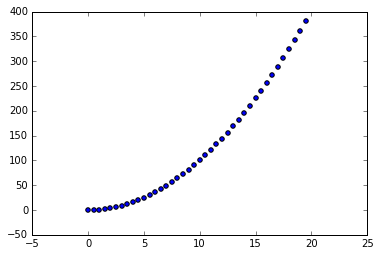

In [3]:
plt.scatter(x,y)

In [4]:
#lr.fit(x,y)#<-- This doesn't work!!
#We need to reshape from 1D to 2D vectors

x = x[:,None]
y = y[:,None]
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

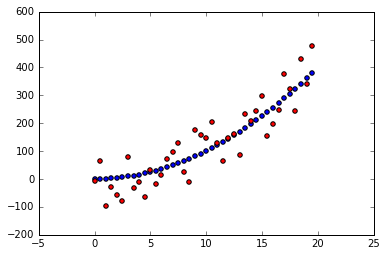

In [15]:
y_noise = 200*np.random.rand(40,1) - 100
y_n = y + y_noise
poly = PolynomialFeatures(5, include_bias = False)
x_predict = np.arange(0,30,0.5)[:, None] 
x_p = poly.fit_transform(x_predict)
x_5 = poly.fit_transform(x)
lr.fit(x_5,y_n)
predict_y_n = lr.predict(x_p)
plt.scatter(x, y, c ='blue')
plt.scatter(x, y_n, c ='red')


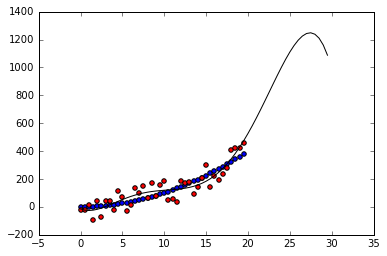

In [10]:
plt.scatter(x, y, c ='blue')
plt.scatter(x, y_n, c ='red')
plt.plot(x_predict, predict_y_n, c ='black', label = '3rd Degree')

In [6]:
lr.coef_

array([[  9.20733482e+01,  -2.59681982e+01,   3.02899345e+00,
         -1.50657823e-01,   2.80193672e-03]])

[[  9.13742192e+01  -2.57459858e+01   3.00133841e+00  -1.49176871e-01
    2.77335009e-03]]


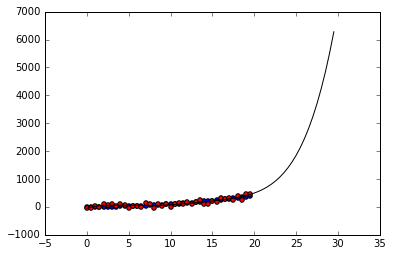

In [7]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.01) #Is the alpha that affects the weights!!
clf.fit(x_5, y_n)
print clf.coef_
predict_y_n = clf.predict(x_p)
plt.scatter(x, y, c ='blue')
plt.scatter(x, y_n, c ='red')
plt.plot(x_predict, predict_y_n, c ='black', label = '3rd Degree')

[[ 0.00715796  0.06315591  0.30537708 -0.02658066  0.00070794]]


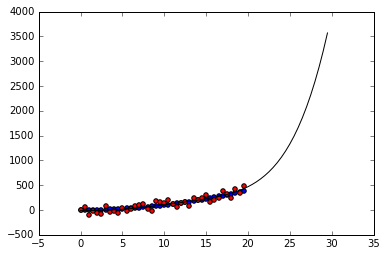

In [16]:
clf = Ridge(alpha=100000) #Is the alpha that affects the weights!!
clf.fit(x_5, y_n)
print clf.coef_
predict_y_n = clf.predict(x_p)
plt.scatter(x, y, c ='blue')
plt.scatter(x, y_n, c ='red')
plt.plot(x_predict, predict_y_n, c ='black', label = '3rd Degree')